In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
class linear_regression():
    def __init__(self , learning_rate , no_of_interation):
        self.learning_rate = learning_rate
        self.no_of_interation = no_of_interation

    def fit(self , X , y):
        self.m , self.n = X.shape

        self.w = np.zeros(self.n)
        self.b = 0

        self.X = X
        self.y = y

        for i in range(self.no_of_interation):
            self.update_weights()

    def update_weights(self):
        y_pred = self.predict(self.X)

        dw = -(2 * (self.X.T).dot(self.y - y_pred)) / self.m
        db = -2 * np.sum(self.y - y_pred) / self.m


        self.w = self.w - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db

    def predict(self , X):
        return X.dot(self.w) + self.b


In [8]:
df = pd.read_csv("g:\desktop\ml with np\Salary_Data.csv")

df.head(10)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Amir\AppData\Local\Temp\ipykernel_25128\881528403.py:1: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv("g:\desktop\ml with np\Salary_Data.csv")


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [9]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [43]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [13]:
X = df.iloc[ : ,: -1].values
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [15]:
y = df.iloc[:,-1]
y

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64

In [39]:
X_train , X_test , y_train , y_test = train_test_split(X , y , random_state= 2, test_size=0.33 )


In [44]:
model = linear_regression(learning_rate= 0.02 , no_of_interation= 1500)

In [45]:
model.fit(X_train , y_train)


In [46]:
print(model.w[0])
print(model.b)

9512.976692950808
23707.586634999665


In [48]:
test_data_predict = model.predict(X_test)

test_data_predict


array([ 36074.45633584,  34171.86099725,  66515.98175328,  58905.60039892,
        91249.72115495,  80785.4467927 , 101713.9955172 ,  52246.51671385,
        42733.5400209 ,  88395.82814707])

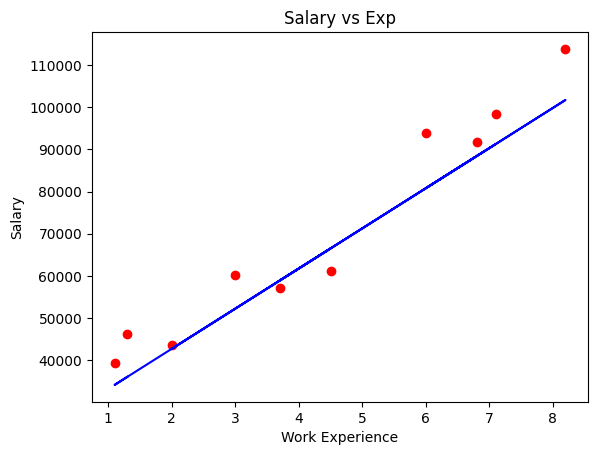

In [49]:
plt.scatter(X_test, y_test, color = "red")
plt.plot(X_test,test_data_predict,color = "blue")
plt.xlabel("Work Experience")
plt.ylabel("Salary")
plt.title("Salary vs Exp")
plt.show()